Para el proyecto de ODE les propongo que analicemos el sistema de ecuaciones diferenciales definidas por el modelo epidemiológico SIR tal como se define en el link:
 https://en.m.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_without_vital_dynamics

El proyecto consistirá entonces en:

1. Resolver el sistema de ecuaciones con:
1.1. Método de Euler implementación propia.
1.2. Método de RK4 implementación propia.
1.3. Utilizando odeint de scipy.
2. Comparar el resultado de cada solución encontrada.
3. Determinar si cada solución converge o no.
4. Estudio de dependencia de curva de infectados y recuperados con respecto a los parámetros libres del sistema.
5. Bajar los datos del número de infectados en Wuhan para la COVID-19 y tratar de ajustarlos con este modelo y encontrar los valores óptimos del modelo SIR que describan dichos datos. Debe explicar el método utilizado para realizar el ajuste.

Lucas Quiceno.\
Carlos Betancur.

# 1. Ecuaciones diferenciales

# $\frac{dS}{dt}=-\frac{\beta IS}{N}$
# $\frac{dI}{dt}=\frac{\beta IS}{N}- \gamma I$
# $\frac{dR}{dt}= \gamma I$


In [66]:
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import odeint
from IPython.html.widgets import interact
#%pylab inline

## 1.1 Método de Euler.

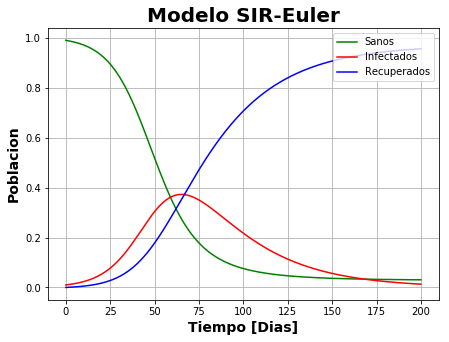

In [65]:
Beta = 0.6
Gama = 0.033
N = 5.0

def Sp(S,I): return -(Beta*S*I)/N # Ecuacion diferencial para los sanos
def Ip(S,I): return (Beta*S*I)/N-Gama*I # Ecuacion diferencial para los Infectados
def Rp(I,R): return Gama*I # Ecuacion diferencial para los recuperados

# Condiciones iniciales de las ED
St0 =[0.99] # Sanos  (Tamaño de la poblacion) 99% Sanos
It0 =[0.01] # Infectados (Paciente cero) 1% Infectados
Rt0 =[0] # Recuperados 0% Recuperados
t = [0] # Tiempo
h=0.001 # Paso del tiempo

k = 0 # Variable que toma valores enteros y aumenta en una unidad cada iteracion

while t[k]<=200.0:
    #Solucion de Euler
    St0l=St0[k]+h*(Sp(St0[k],It0[k]))      
    It0l=It0[k]+h*(Ip(St0[k],It0[k]))
    Rt0l=Rt0[k]+h*(Rp(It0[k],Rt0[k]))
        
    St0.append(St0l)
    It0.append(It0l)
    Rt0.append(Rt0l)
    
    
    t[k] = t[k] + h
    t.append(t[k])
    k= k + 1
    
    

figure(figsize=(7,5)) # Tamaño de la figura
title('Modelo SIR-Euler',fontsize=20, fontweight='bold')
xlabel('Tiempo [Dias]',fontsize=14, fontweight='bold') 
ylabel('Poblacion',fontsize=14, fontweight='bold') 
plot(t,St0,'-g',linewidth=1.5, label= 'Sanos') 
plot(t,It0,'-r',linewidth=1.5, label= 'Infectados')
plot(t,Rt0,'-b',linewidth=1.5, label= 'Recuperados')
grid(True)
legend(loc=1)
savefig('EULER')

## 1.2 Método de RK4

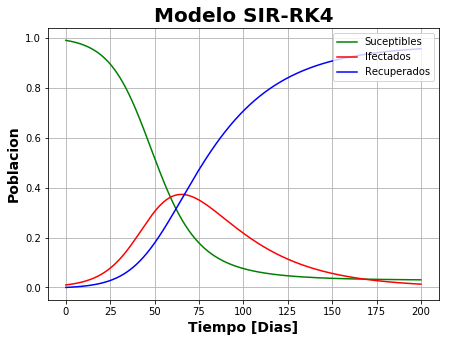

In [41]:
def Sp(T,S,I,Beta=0.6,Gama=0.033,N=5.): return -(Beta*S*I)/N # Ecuacion diferencial para los sanos
def Ip(T,S,I,Beta=0.6,Gama=0.033,N=5.): return (Beta*S*I)/N-Gama*I # Ecuacion diferencial para los Infectados
def Rp(T,I,R,Beta=0.6,Gama=0.033,N=5.): return Gama*I # Ecuacion diferencial para los recuperados



StU0 =[0.99] # Sanos  (Tamaño de la poblacion)
ItU0 =[0.01] # Infectados (Paciente cero)
RtU0 =[0] # Recuperados
t = [0] # Tiempo
h=0.001 # Paso del tiempo
j = 0

while t[j]<=200.0:
    
    k1Sp = Sp(t[j],StU0[j],ItU0[j])
    k2Sp = Sp(t[j]+0.5*h,ItU0[j]+0.5*k1Sp*h, StU0[j]+0.5*k1Sp*h)
    k3Sp = Sp(t[j]+0.5*h,ItU0[j]+0.5*k2Sp*h, StU0[j]+0.5*k2Sp*h)
    k4Sp = Sp(t[j]+h,ItU0[j]+k3Sp*h, StU0[j]+k3Sp*h)
    
    k1Ip = Ip(t[j],StU0[j],ItU0[j])
    k2Ip = Ip(t[j]+0.5*h,StU0[j]+0.5*k1Ip*h, ItU0[j]+0.5*k1Ip*h)
    k3Ip = Ip(t[j]+0.5*h,StU0[j]+0.5*k2Ip*h, ItU0[j]+0.5*k2Ip*h)
    k4Ip = Ip(t[j]+h,StU0[j]+k3Ip*h, ItU0[j]+k3Ip*h)
    
    k1Rp = Rp(t[j],ItU0[j],RtU0[j])
    k2Rp = Rp(t[j]+0.5*h,ItU0[j]+0.5*k1Rp*h, RtU0[j]+0.5*k1Rp*h)
    k3Rp = Rp(t[j]+0.5*h,ItU0[j]+0.5*k2Rp*h, RtU0[j]+0.5*k2Rp*h)
    k4Rp = Rp(t[j]+h,ItU0[j]+k3Rp*h, RtU0[j]+k3Rp*h)
    
    
    
    ts = t[j]+h
    Ss = StU0[j]+((k1Sp+2*k2Sp+2*k3Sp+k4Sp)*h)/6.
    Is = ItU0[j]+((k1Ip+2*k2Ip+2*k3Ip+k4Ip)*h)/6.
    Rs = RtU0[j]+((k1Rp+2*k2Rp+2*k3Rp+k4Rp)*h)/6.
    
    t.append(ts)
    StU0.append(Ss)
    ItU0.append(Is)
    RtU0.append(Rs)
    
    j=j+1
    
figure(figsize=(7,5)) 
title('Modelo SIR-RK4',fontsize=20, fontweight='bold')
xlabel('Tiempo [Dias]',fontsize=14, fontweight='bold') 
ylabel('Poblacion',fontsize=14, fontweight='bold') 
plot(t,StU0,'-g',label='Suceptibles')
plot(t,ItU0,'-r',label='Ifectados')
plot(t,RtU0,'-b',label='Recuperados')
legend(loc=1)
grid()
savefig('Kuta4')

## 1.3 Método Odeint

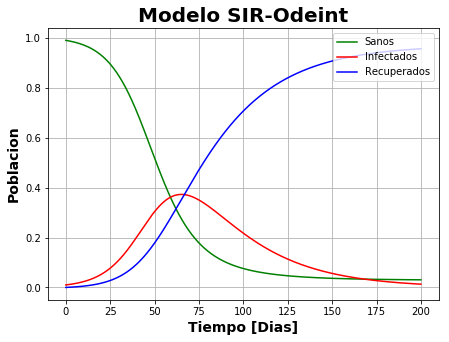

In [42]:
Beta = 0.6
Gama = 0.033
N = 5.

def f(state, tO):
    S, I, R = state  

    return -(Beta*S*I)/N, (Beta*S*I)/N-Gama*I, Gama*I  

state0 = [0.99, 0.01, 0.0] # Condiciones iniciales
tO = np.arange(0.0, 200.001, h)

states = odeint(f, state0, tO) # Integre el sistema de ecuaciones:


figure(figsize=(7,5)) # Tamaño de la figura
title('Modelo SIR-Odeint',fontsize=20, fontweight='bold')
xlabel('Tiempo [Dias]',fontsize=14, fontweight='bold') 
ylabel('Poblacion',fontsize=14, fontweight='bold') 
plot(t,states[:,0],'-g',linewidth=1.5, label= 'Sanos') 
plot(t,states[:,1],'-r',linewidth=1.5, label= 'Infectados')
plot(t,states[:,2],'-b',linewidth=1.5, label= 'Recuperados')
grid(True)
legend(loc=1)
savefig('Odeint')

# 2. Comparación entre métodos.

Para la comparación entre los 3 métodos usados se gráfican dichos métodos. Es de esperar, por el número de pasos, que las 3 soluciones sean prácticamente la misma.

## Comparación Euler-Odeint

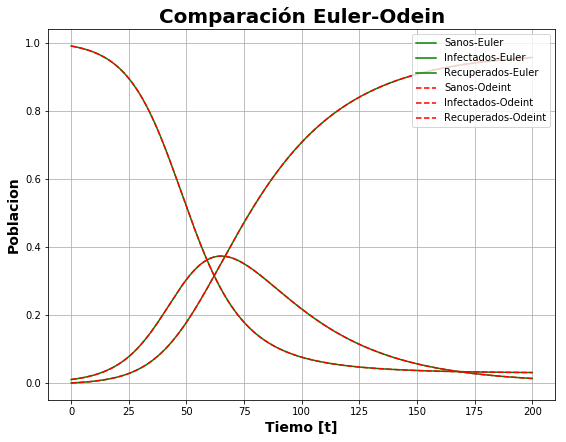

In [43]:
figure(figsize=(20,15)) # Tamaño de la figura
subplot(2,2,1) # Lado izquierdo
title('Comparación Euler-Odein',fontsize=20, fontweight='bold')
xlabel('Tiemo [t]',fontsize=14, fontweight='bold') 
ylabel('Poblacion',fontsize=14, fontweight='bold') 

plot(t,St0,'g',linewidth=1.5, label= 'Sanos-Euler') 
plot(t,It0,'g',linewidth=1.5, label= 'Infectados-Euler')
plot(t,Rt0,'g',linewidth=1.5, label= 'Recuperados-Euler')

plot(tO,states[:,0],'--r',linewidth=1.5, label= 'Sanos-Odeint')
plot(tO,states[:,1],'--r',linewidth=1.5, label= 'Infectados-Odeint')
plot(tO,states[:,2],'--r',linewidth=1.5, label= 'Recuperados-Odeint')
grid(True)
legend(loc=1)
show()

## Comparación RK4-Odeint

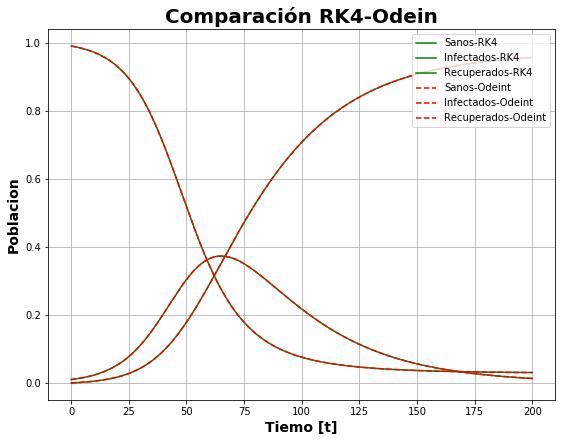

In [44]:
figure(figsize=(20,15)) # Tamaño de la figura
subplot(2,2,1) # Lado izquierdo
title('Comparación RK4-Odein',fontsize=20, fontweight='bold')
xlabel('Tiemo [t]',fontsize=14, fontweight='bold') 
ylabel('Poblacion',fontsize=14, fontweight='bold') 

plot(t,StU0,'g',linewidth=1.5, label= 'Sanos-RK4') 
plot(t,ItU0,'g',linewidth=1.5, label= 'Infectados-RK4')
plot(t,RtU0,'g',linewidth=1.5, label= 'Recuperados-RK4')

plot(tO,states[:,0],'--r',linewidth=1.5, label= 'Sanos-Odeint')
plot(tO,states[:,1],'--r',linewidth=1.5, label= 'Infectados-Odeint')
plot(tO,states[:,2],'--r',linewidth=1.5, label= 'Recuperados-Odeint')
grid(True)
legend(loc=1)
show()

## Comparación RK4-Euler

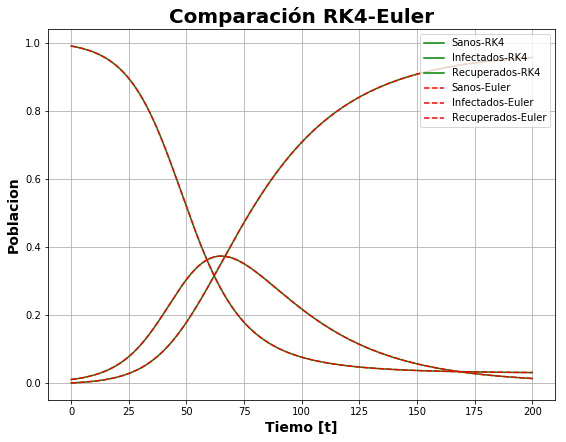

In [45]:
figure(figsize=(20,15)) # Tamaño de la figura
subplot(2,2,1) # Lado izquierdo
title('Comparación RK4-Euler',fontsize=20, fontweight='bold')
xlabel('Tiemo [t]',fontsize=14, fontweight='bold') 
ylabel('Poblacion',fontsize=14, fontweight='bold') 

plot(t,StU0,'g',linewidth=1.5, label= 'Sanos-RK4') 
plot(t,ItU0,'g',linewidth=1.5, label= 'Infectados-RK4')
plot(t,RtU0,'g',linewidth=1.5, label= 'Recuperados-RK4')

plot(tO,St0,'--r',linewidth=1.5, label= 'Sanos-Euler')
plot(tO,It0,'--r',linewidth=1.5, label= 'Infectados-Euler')
plot(tO,Rt0,'--r',linewidth=1.5, label= 'Recuperados-Euler')
grid(True)
legend(loc=1)
show()

# 3. Estudio de la convergencia.

Para estudiar la convergencia de cada método usado se debe comparar el método (la apróximacion númerica) con la solución exacta de la ecuación diferencia. Debido a que el sistema de SIR no tiene solución exacta se toma cómo solución exacta la solución dada por Odeint y se compara los otros dos métodos con está. 

## Convergencia método de Euler.

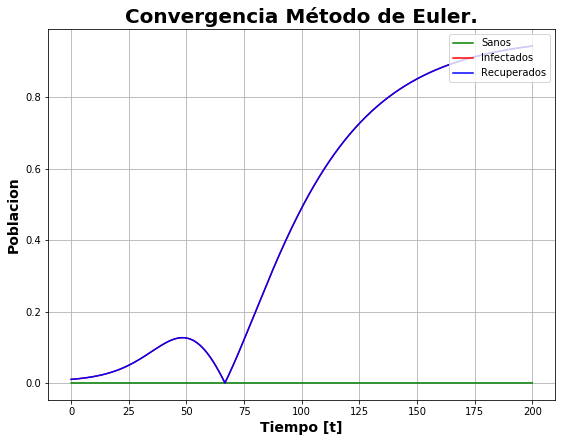

In [46]:
S_difeEU=[] #lista vacia para sanos
I_difeEU=[] #lista vacia para infectados
R_difeEU=[] #lista vacia para recuperados
s_o=states[:,0]
r_o=states[:,1]
i_o=states[:,2]

for i in range(len(St0)): #diferencia entre solución 'exacta' y método de euler
    difS=np.abs(St0[i]-s_o[i])
    difR=np.abs(Rt0[i]-r_o[i])
    difI=np.abs(It0[i]-i_o[i])
 
    S_difeEU.append(difS)
    I_difeEU.append(difI)
    R_difeEU.append(difR)
    
figure(figsize=(20,15)) # Tamaño de la figura
subplot(2,2,1) # Lado izquierdo
title('Convergencia Método de Euler.',fontsize=20, fontweight='bold')
xlabel('Tiempo [t]',fontsize=14, fontweight='bold') 
ylabel('Poblacion',fontsize=14, fontweight='bold') 
plot(t,S_difeEU,'-g',linewidth=1.5, label= 'Sanos') 
plot(t,I_difeEU,'-r',linewidth=1.5, label= 'Infectados')
plot(t,R_difeEU,'-b',linewidth=1.5, label= 'Recuperados')
grid(True)
legend(loc=1)
show()

## Convergencia método de RK4.

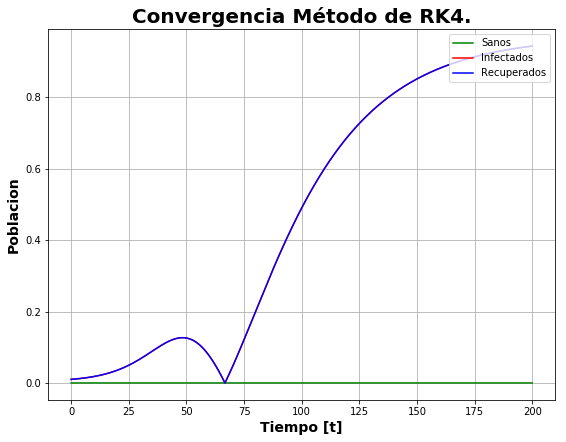

In [47]:
S_difeRK=[]
I_difeRK=[]
R_difeRK=[]

for i in range(len(StU0)): #diferencia entre solución 'exacta' y método de RK4
    difRKS=np.abs(StU0[i]-s_o[i])
    difRKI=np.abs(ItU0[i]-i_o[i])
    difRKR=np.abs(RtU0[i]-r_o[i])
    
    S_difeRK.append(difRKS)
    I_difeRK.append(difRKI)
    R_difeRK.append(difRKR)
    
figure(figsize=(20,15)) # Tamaño de la figura
subplot(2,2,1) # Lado izquierdo
title('Convergencia Método de RK4.',fontsize=20, fontweight='bold')
xlabel('Tiempo [t]',fontsize=14, fontweight='bold') 
ylabel('Poblacion',fontsize=14, fontweight='bold') 
plot(t,S_difeRK,'-g',linewidth=1.5, label= 'Sanos') 
plot(t,I_difeRK,'-r',linewidth=1.5, label= 'Infectados')
plot(t,R_difeRK,'-b',linewidth=1.5, label= 'Recuperados')
grid(True)
legend(loc=1)
show()

# Punto 4

Veamos como se comporta la solucion para distintos parmaetros de $\beta$ y $\gamma$

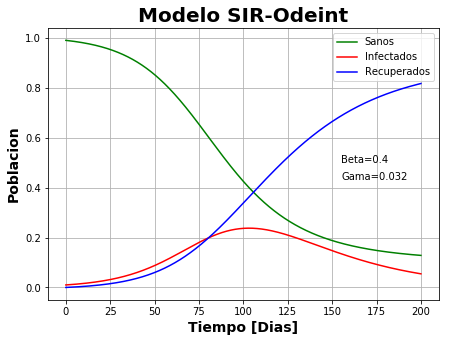

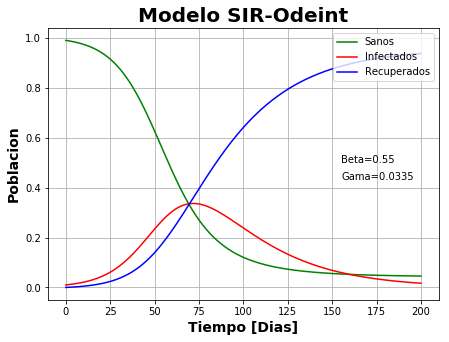

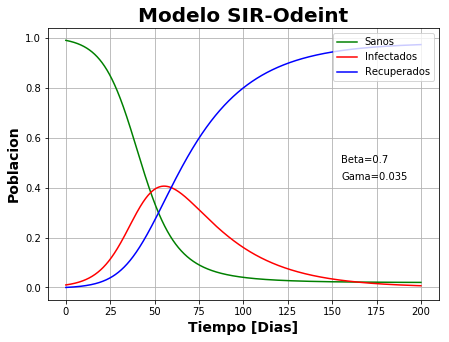

In [59]:

Beta = np.linspace(0.4,0.7,3)
Gama = np.linspace(0.032,0.035,3)
N = 5.

for i in range(len(Beta)):
    

    def f(state, tO):
        S, I, R = state  

        return -(Beta[i]*S*I)/N, (Beta[i]*S*I)/N-Gama[i]*I, Gama[i]*I  

    state0 = [0.99, 0.01, 0.0] # Condiciones iniciales
    tO = np.arange(0.0, 200.001, h)

    states = odeint(f, state0, tO) # Integre el sistema de ecuaciones:


    figure(figsize=(7,5)) # Tamaño de la figura
    title('Modelo SIR-Odeint',fontsize=20, fontweight='bold')
    xlabel('Tiempo [Dias]',fontsize=14, fontweight='bold') 
    ylabel('Poblacion',fontsize=14, fontweight='bold') 
    plot(t,states[:,0],'-g',linewidth=1.5, label= 'Sanos') 
    plot(t,states[:,1],'-r',linewidth=1.5, label= 'Infectados')
    plot(t,states[:,2],'-b',linewidth=1.5, label= 'Recuperados')
    text(155,0.5,'Beta='+str(Beta[i]))
    text(155,0.43,'Gama='+str(Gama[i]))
    grid(True)
    #legend(handles=[f])
    legend(loc=1)
    savefig('Odeint')

# Punto 5

In [35]:
confirmados = np.loadtxt('Conf.txt')
muertos = np.loadtxt('Muer.txt')
recuperados = np.loadtxt('Recu.txt')
Infectados=[]

print(len(confirmados))

for i in range(len(confirmados)):
    Infe= confirmados[i]-muertos[i]-recuperados[i]
    Infectados.append(Infe)
    

t = np.arange(0,167,1)

Beta = 2.0#2.0
N = 11.0e6 # Tamaño de la poblacion de Wuhan
Gama = 1.8#1.8

def parametros(Beta,Gama):
    


    def f(state, tO):
        S, I, R = state  
    

    
        return -(Beta*S*I)/N, (Beta*S*I)/N-Gama*I, Gama*I
    state0 = [11e6, 444, 0.0] # Condiciones iniciales
    tO = np.arange(0.0, 200.0, 0.01)

    states = odeint(f, state0, tO) # Integre el sistema de ecuaciones:    
    
    
    figure(figsize=(20,15))
    subplot(2,2,1)
    title('Modelo SIR-Odeint',fontsize=20, fontweight='bold')
    xlabel('Tiempo [t]',fontsize=14, fontweight='bold') 
    ylabel('Poblacion',fontsize=14, fontweight='bold') 
    xlim(1,100)
    ylim(0,55000)
    grid()
    plot(tO,states[:,0])
#plt.plot(t,StU0)
    plot(tO,states[:,1])
#plt.plot(t,ItU0)
    plot(tO,states[:,2])
#plt.plot(t,RtU0)
    plot(t,Infectados)
    show()
    
    return 

interact(parametros,Beta=(2.,2.4,0.01),Gama=(1.49,2.5,0.01))

167


interactive(children=(FloatSlider(value=2.2, description='Beta', max=2.4, min=2.0, step=0.01), FloatSlider(val…

<function __main__.parametros(Beta, Gama)>